## <span style="color:green">Комментарий от ревьювера (все здОрово)</span>

Мне очень понравилась твоя работа! Давай по порядку:

1. Все (или почти все) реализовано через автоматизацию. Функции повсюду, а это значит нет лишнего кода и рутины. 

2. Прекрасная визуализация. Графики не напрягают, комфортны, понятны. Подобрана правильная цветовая схема.Короче, и понятно и для глаза приятно.

3. Все рассуждения верные. Очень логичные и осмысленные. Ничего лишнего, все по полкам. Выводы правильные, хоть я где-то и не согласился, но аналитик тут ты, и ты очень грамотно обосновываешь свою точку зрения.

4. Ты понял статистику, уже знаешь много крутых фич.


Короче, молодец! Я желаю тебе успехов в учебе, а с твоим подходом, уситчивостью и старанием, я думаю, успех не заставит долго ждать. Удачи!


# Рынок продаж видеоигр

 **Цель** :Приоритизировть гипотезы, запустить A/B-тест и проанализировать результаты.

##### План исследования
 * 1) Проведем первчный анализ исходных данных, определим проблемные места, сформулируем методы решения
 * 2) На основе первичного анализа проведем предобработку данных, приведем к корректному виду
 * 3) Cформируем таблицу, которую будем использовать для исследований
 * 3) Изучим базовые занчения, проведем необходимые исследования
 * 4) Проверьте гипотезы и напишем итоговй вывод
 

### Изучим общую информацию

In [2]:
# Необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

%matplotlib inline

In [3]:
df = pd.read_csv('/datasets/games.csv')

Описание данных

 * Name — название игры
 * Platform — платформа
 * Year_of_Release — год выпуска
 * Genre — жанр игры
 * NA_sales — продажи в Северной Америке (миллионы долларов)
 * EU_sales — продажи в Европе (миллионы долларов)
 * JP_sales — продажи в Японии (миллионы долларов)
 * Other_sales — продажи в других странах (миллионы долларов)
 * Critic_Score — оценка критиков (максимум 100)
 * User_Score — оценка пользователей (максимум 10)
 * Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
df.head(10) # ПОсмотрим таблицу

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.info() # Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Из первичного анализа нам следуют более подробно разобрать пропуски, заменить тип данных для экономии места в некоторых столбцах, и для удобства привести ряд данных к одному регистру. А так же проверить таблицу на дубликаты.

### Шаг 2. Предобработка данных

In [6]:
df.dropna(subset = ['Name', 'Genre', 'Year_of_Release' ], inplace = True) # Удалим не значитеьное кол-во пропусков в стобцах, на итоговый вывод не повлияет

In [7]:
df.duplicated().sum()# Дубликаты

0

In [8]:
df['User_Score'].unique()
# TBD означет, что на данный момент рейтинг ещё не определён
df.loc[df['User_Score'] == 'tbd', 'User_Score'] = np.nan

In [9]:
# Изменение типов данных

df['Year_of_Release'] = df['Year_of_Release'].astype('int')
df['User_Score'] = df['User_Score'].astype('float')

In [10]:
df['Name'] = df['Name'].str.lower() # Приведем ряд столбцов к нижнему регистру
df['Platform'] = df['Platform'].str.lower()
df['Genre'] = df['Genre'].str.lower()

In [11]:
df.columns = map(str.lower, df.columns)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # Создадим дополнительный стоблец с общей прибылью


### Вывод

Мы удалили незначительные пропуски, заменили тип данных в столбцых *User_Score*, *Year_of_Release*. Мы обнаружили интересное значение *tbd* ( оценка еще не определенна), заменили это хначение на Nan для более удобного анализа. В Стобцах где выставляется оценка и рейтинг, ничего не испровляли потому что замена средним, будет неправильным решением так как на оценку и рейтинг влияет множество различных факторов, которые мы при нынешних ресурсах учесть не можем

### Шаг 3.Исследование данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c796a2c10>]],
      dtype=object)

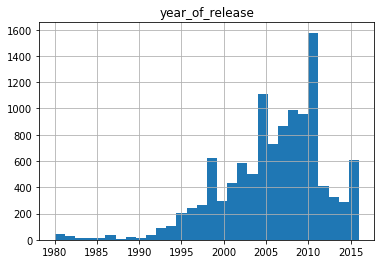

In [14]:
df.pivot_table(index='name', values='year_of_release',  aggfunc='mean').hist(bins =30) # Продажа игр по годам


Думаю, что график не особо может, что то дать потому что от огромного кол - ва параметров зависит, сколько игр выпускалось в тот или иной год ( спрос, кол - во компания, кол -во платформ и т.д.)

In [15]:
 df.groupby('platform')['total_sales'].sum().sort_values() # Посмотрим прибыль по всем платформам

platform
pcfx       0.03
gg         0.04
3do        0.10
tg16       0.16
ws         1.42
ng         1.44
scd        1.86
dc        15.95
gen       28.35
sat       33.59
psv       53.81
wiiu      82.19
2600      86.48
xone     159.32
gc       196.73
snes     200.04
n64      218.01
nes      251.05
xb       251.57
gb       254.43
pc       255.76
3ds      257.81
psp      289.53
gba      312.88
ps4      314.14
ps       727.58
ds       802.78
wii      891.18
ps3      931.34
x360     961.24
ps2     1233.56
Name: total_sales, dtype: float64

In [16]:
srez = df.query('platform in ("ps2","x360","ps3","wii","pc","ds") and (year_of_release > 2003)').sort_values(by = 'total_sales')
# определим самые прибыльные

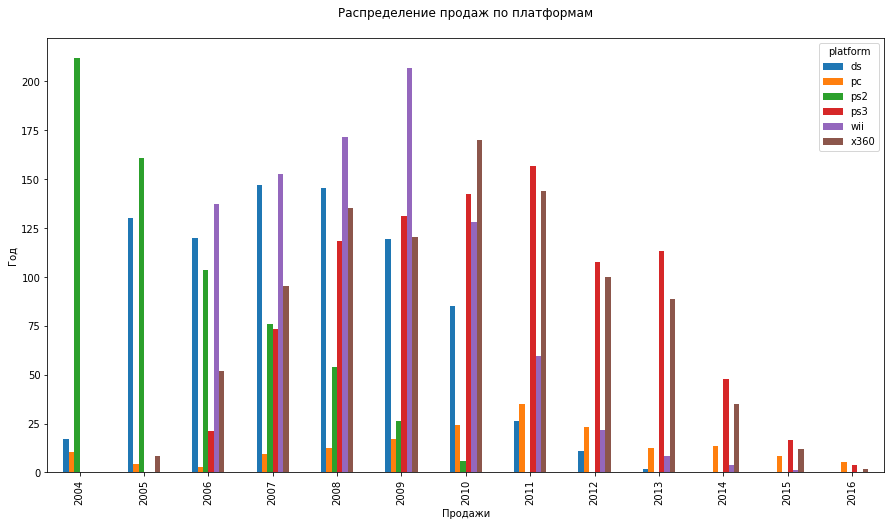

In [17]:
(srez.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
.T
 .plot(kind='bar',figsize=(15,8))
)
plt.title('Распределение продаж по платформам'+ "\n")
plt.xlabel('Продажи')
plt.ylabel('Год')

plt.show()

#### Промежуточный вывод

Мы отобрали 6 самых популярных платформ. Можем четко видим, что та или иная платформа имеет жизненный цикл. Ps2 была популярна до 2007-2008, в этот же промежуток появлется новая версия этой платформы Ps3 и начинает вытеснять страую платформу из чего мы можем сделать вывод, что с выходом обновленной модели платформы, старая модель теряет рынок.

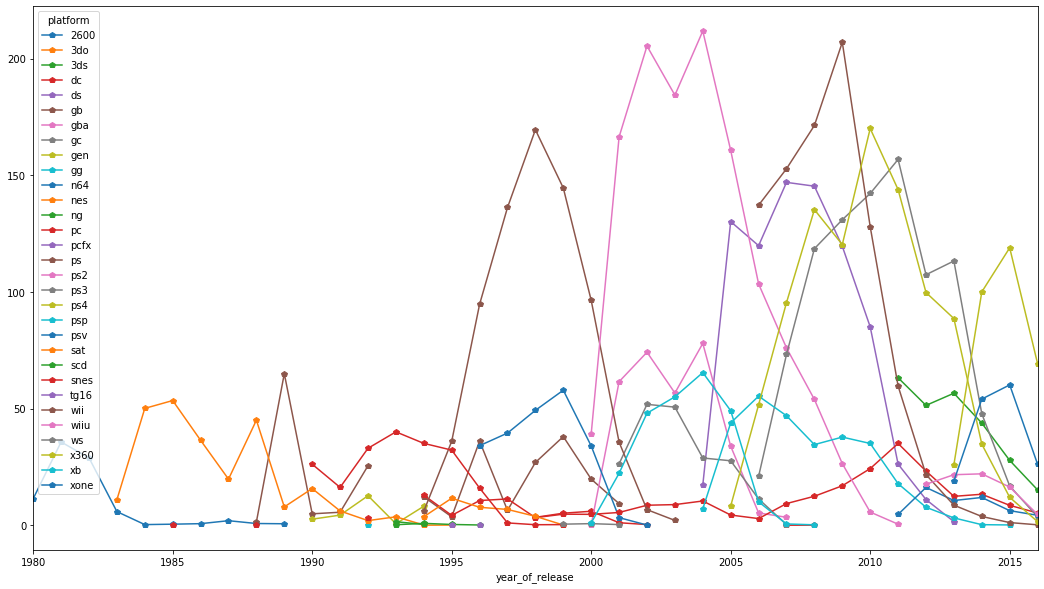

In [18]:
# код ревьювера
df.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum').plot(figsize=(18, 10), marker = 'p')

In [19]:
game= df.query('year_of_release >= 2013')# Создадим таблицу с акутальными платформами

In [20]:
game.groupby('platform')['total_sales'].sum().sort_values()

platform
ds        1.54
psp       3.50
wii      13.66
psv      32.99
pc       39.43
wiiu     64.63
x360    136.80
3ds     143.25
xone    159.32
ps3     181.43
ps4     314.14
Name: total_sales, dtype: float64

In [21]:
game = df.query('platform in ("ps4","xone","3ds","wiiu","x360")and year_of_release >= 2013').sort_values(by = 'total_sales')

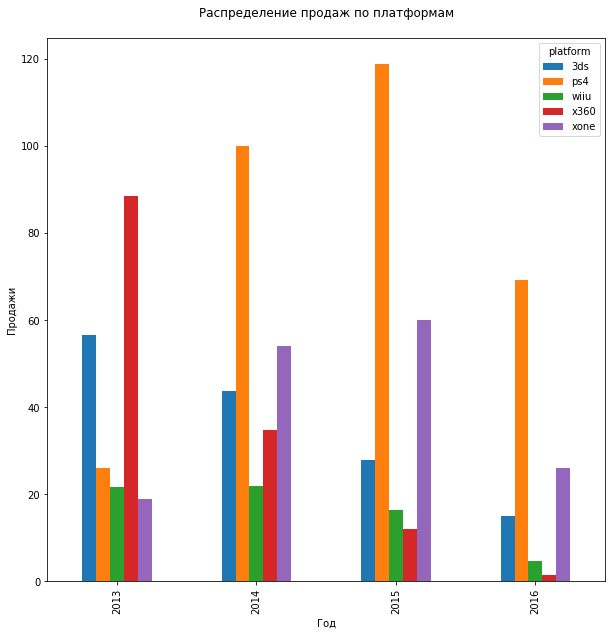

In [22]:
(game.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
.T
 .plot(kind='bar',figsize=(10,10))
)
plt.title('Распределение продаж по платформам'+ "\n")
plt.xlabel('Год')
plt.ylabel('Продажи')

plt.show()

## <span style="color:orange">Комментарий от ревьювера (принимаем к размышлению)</span>
А если не брать такой большой размер графика, надписи будут даже видны)

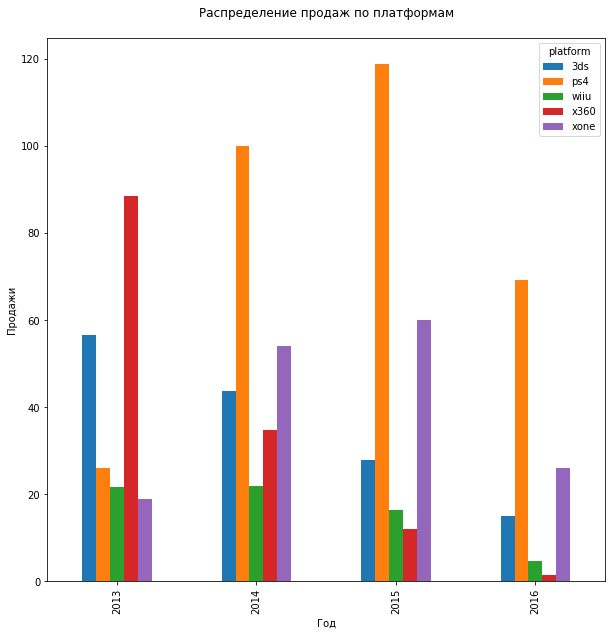

In [23]:
# код ревьювера
(game.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
.T
 .plot(kind='bar',figsize=(10,10))
)
plt.title('Распределение продаж по платформам'+ "\n")
plt.xlabel('Год')
plt.ylabel('Продажи')

plt.show()

#### Промежуточный вывод

Мы взяли топ 4 самых популярных платформы, с 2013 года когда  часть из них  появились на рынке. Мы диаграмме мы точно можем сделать вывод, что платформы *3ds* и *wuii*, стагнируеют это скорее всего связанно, что они давно на рынке и в техническом плане устарели, а держаться как то на плаву им позволяет огромная фан база и по этому в будущем можно присмотреться к следющему поколению этих платформ. Но в нашем случае основный акцент нужно сделать на *ps4* и  *xone*, как относительно новых и успешных платформ на рынке.

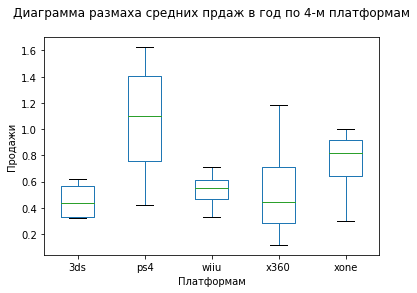

In [24]:
(game
 .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='mean')
 .T
 .plot(kind='box')
)
plt.title('Диаграмма размаха средних прдаж в год по 4-м платформам'+ "\n")
plt.xlabel('Платформам')
plt.ylabel('Продажи')

plt.show()

In [25]:
game.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1243.000000,1243.000000,1243.000000,1243.000000,1243.000000,643.000000,742.000000,1243.000000
mean,2014.620274,0.282325,0.230097,0.076830,0.068946,71.592535,6.600674,0.658198
std,1.071806,0.658900,0.574245,0.303883,0.170287,13.294486,1.509462,1.421217
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.700000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,65.000000,5.800000,0.060000
50%,2015.000000,0.060000,0.050000,0.000000,0.010000,74.000000,6.850000,0.180000
75%,2016.000000,0.265000,0.200000,0.050000,0.060000,81.000000,7.700000,0.610000
max,2016.000000,9.660000,6.310000,4.350000,2.380000,97.000000,9.200000,16.270000


#### Промежуточный вывод

Можем отметить что прибыльу всех платформ по годам имеет нормальное распредлеение. Самая прибыльная платформа ps4 на втором xanoe

In [26]:
top_platform= df.query('platform == "ps4"')#Проанализируем самую прибыльную платформу

In [27]:
top_platforms =top_platform[['total_sales','user_score', 'critic_score']]#Выберем нужные столбцы для анализа

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c74a94c90>,
      dtype=object)

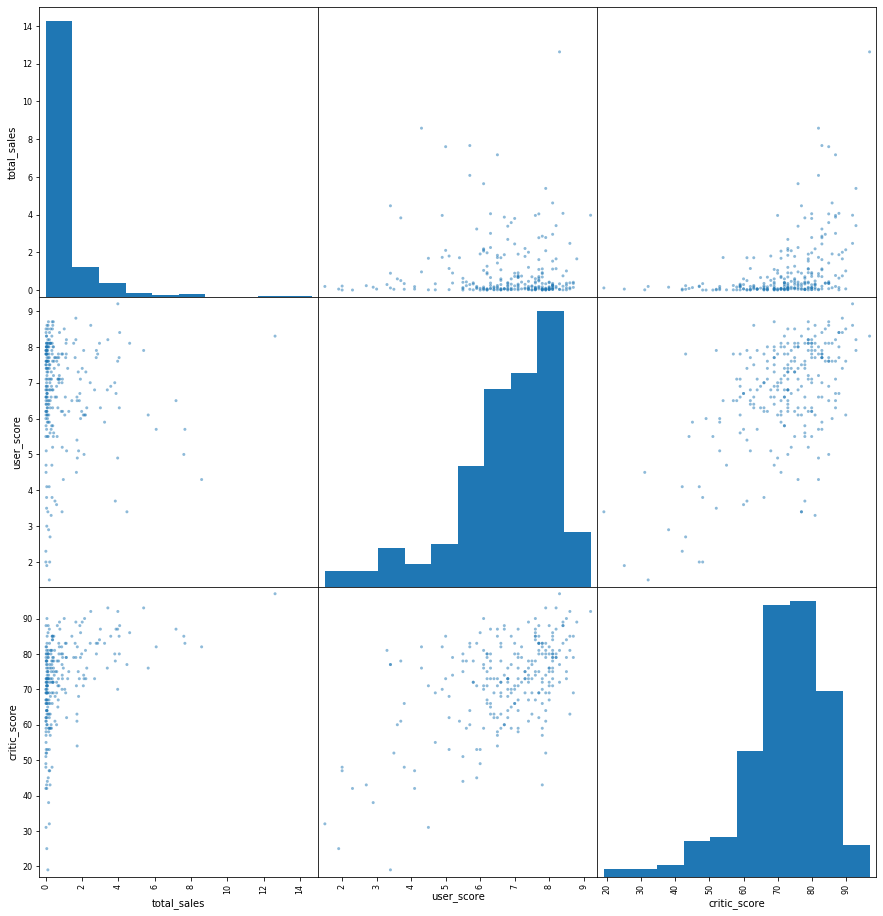

In [28]:
sb_data = top_platforms
pd.plotting.scatter_matrix(
    sb_data
    ,alpha=0.5
    ,figsize=(15,16)
    ,grid = True
)
 #Построим матрицу

Корреляция продаж и оценок по платформе PS4

In [29]:
print(top_platforms['total_sales'].corr(df['user_score']))
print(top_platforms['total_sales'].corr(df['critic_score']))


-0.031957110204556424
0.406567902061781


Корреляция продаж и оценок по всем платформам

In [30]:
print(df['total_sales'].corr(df['user_score']))
print(df['total_sales'].corr(df['critic_score']))


0.08798399271321643
0.24534884547411376


#### Промежуточный вывод

Тут можно сдеать вывож, что в среднем на всех платформах оценка пользователей оказывает влияние на общие продажи меньше, чем оценка критика

In [31]:
genre = game.groupby('genre')['total_sales'].sum().sort_values()# Найдем самые продаваемые жанры

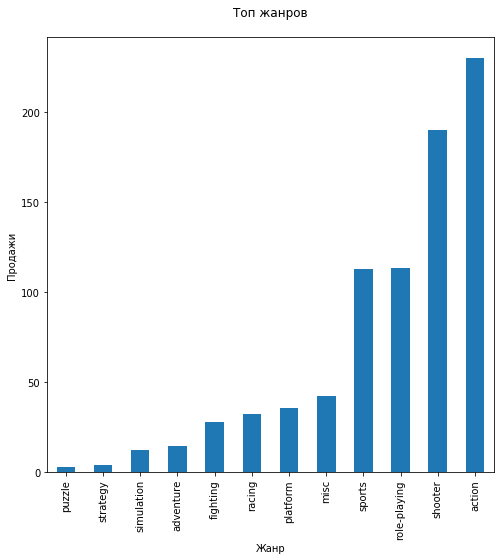

In [32]:
genre.plot(kind='bar',figsize=(8,8))
plt.title('Топ жанров'+ "\n")
plt.xlabel('Жанр')
plt.ylabel('Продажи')

plt.show()

#### Промежуточный вывод

Cреди жанров есть 4(action, shooter, role-playing, sports) лидера, которые превышают  в десятки раз по сумме продаж другие жанры. Делаем вывод это самые популярные жанры, обеспечивающие основную долю продаж.

#### Составим портрет пользователя каждого региона

In [33]:
game.groupby('platform')['na_sales'].sum().sum()

350.92999999999995

In [34]:
def fid_area(region):
    game_sum = game.groupby('platform')['total_sales'].sum().sort_values()
    game_top = game.groupby('platform')[region].sum().sort_values()
    top = game_top.plot(kind='bar',figsize=(8,8))
    loc = game.groupby('platform')[region].sum().sum()
    world_part = game_top/game_sum.sum()
    local_part =game_top/loc
    rate = game.groupby('rating')[region].sum().sort_values()
    genres = game.groupby('genre')[region].sum().sort_values().tail(5)
    return print('----------------Продажи в регионе',  game_top), print('----------------Доля продаж в мире', world_part),  print('----------------Доля продаж в регионе',local_part),print('----------------Топ 5 жанров в регионе', genres), print('----------------Влияние рейтинга на продажи',  rate)
   
    
   

In [35]:
def find_area(region):
    game_sum = game.groupby('platform')['total_sales'].sum().sort_values()
    game_top = game.groupby('platform')[region].sum().sort_values()
    top = (game_top).plot(kind='bar',figsize=(5,5))
     

    plt.title('Tоп платформ в регионе'+ "\n")
    plt.xlabel('Платформам')
    plt.ylabel('Продажи')

    plt.show()
     
    loc = game.groupby('platform')[region].sum().sum()
    world_part = game_top/game_sum.sum()
    local_part =game_top/loc
    genres = game.groupby('genre')[region].sum().sort_values().tail(5).plot(kind='bar',figsize=(5,5))
     

    plt.title('Tоп жанров в регионе'+ "\n")
    plt.xlabel('Жанры')
    plt.ylabel('Продажи')

    plt.show()
    rate = game.groupby('rating')[region].sum().sort_values().plot(kind='bar',figsize=(5,5))
     

    plt.title('Зависимость от рейтинга'+ "\n")
    plt.xlabel('Рейтинг')
    plt.ylabel('Продажи')

    plt.show()
  
    return  
   
    
   
    
   
    
   

### Регион NA

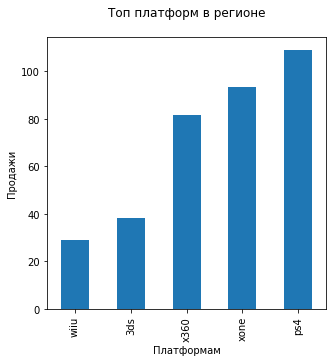

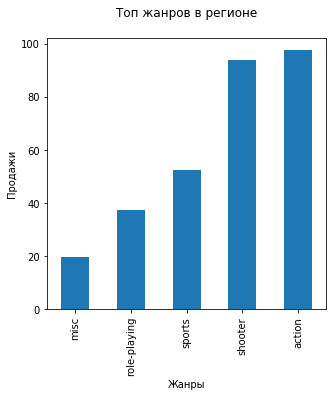

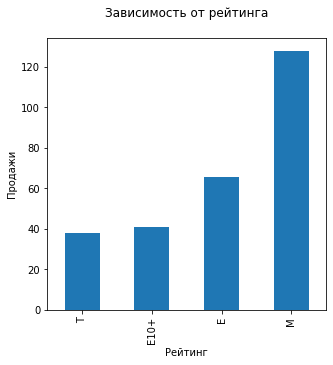

In [36]:
find_area('na_sales')

##### Вывод

В регионе NA первые места занимают платформы линейки Ps and xbox. Лидирующие жанры это action and shooter. Жанры с рейтингомо  М и Е.

### Регион EU

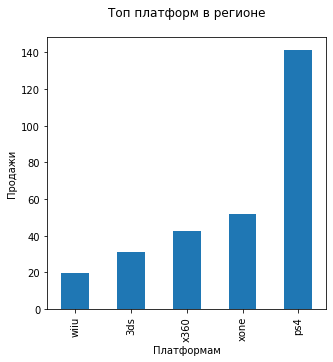

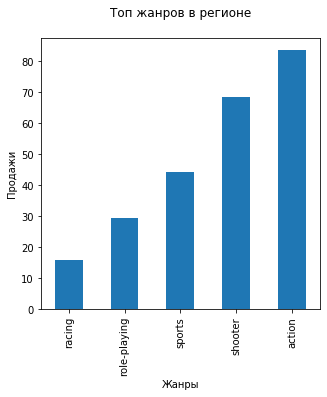

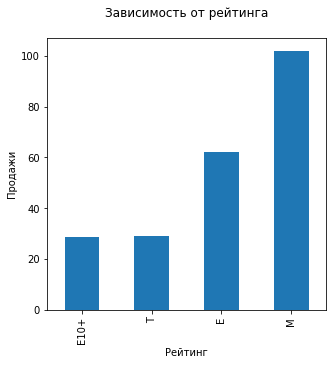

In [37]:
find_area('eu_sales')

##### Вывод

В регионе EU первые места занимают платформы линейки Ps and xbox. Лидирующие жанры это action and shooter. Жанры с рейтингомо  М и Е.

### Регион JP

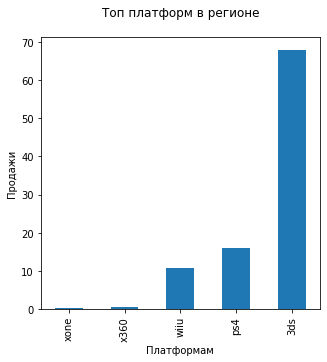

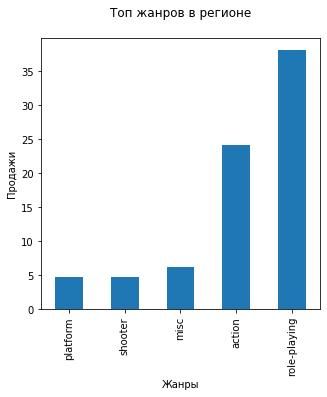

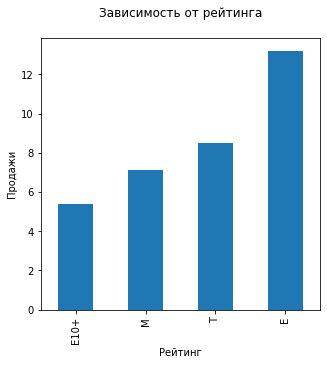

In [38]:
find_area('jp_sales')

##### Вывод

В регионе JP первые место занимает платформа линейки 3dc. Лидирующие жанры это action and role-playing. Жанры с рейтингомо  T и Е.

### Регион Other_sales

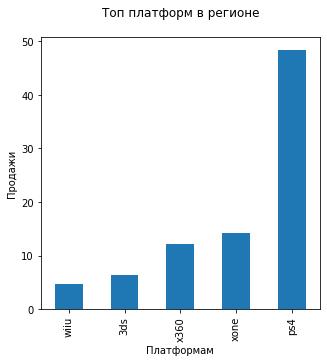

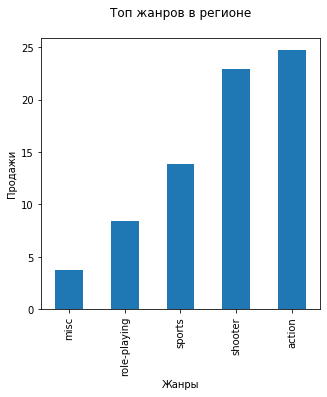

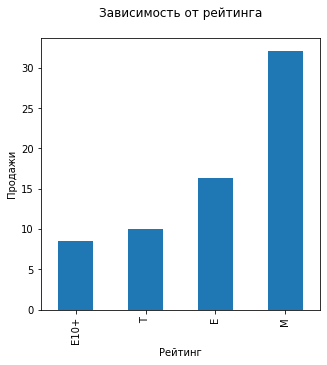

In [39]:
find_area('other_sales')

##### Вывод

В регионе Other первые место занимает платформа линейки Ps and xbox. Лидирующие жанры это action and shooter. Жанры с рейтингом  M и Е.

### Общий вывод

Во всех регионах кроме JP, примерно одинаковая ситуация на первых месатах по платформам у нас Ps4 and xanoe, по жанрам action and shooter, больше всего игр покупают с рейтнгом М and E. А вот в Японии ситуация не похожая ни на один регион платформа номер 1 там это 3ds доля продаж в японии этой платформа 71%, так же ситуация и с жанрами лидируют role-play and actionю, больше всего игр продается с рейтингом Е, Т.

# Гипотезы

In [40]:
gip = df.query('platform == ("xone","pc")')# Cоставляем нужную нам таблицу

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


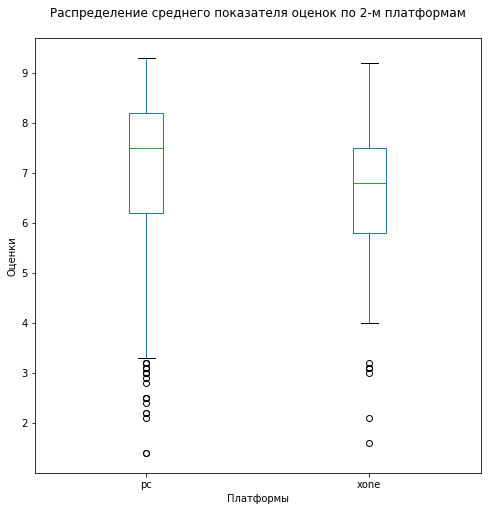

In [41]:
(gip.pivot_table(index='platform', columns='name', values='user_score', aggfunc='mean')
 .T
 .plot(kind='box',figsize=(8,8))
)
plt.title('Распределение среднего показателя оценок по 2-м платформам'+ "\n")
plt.xlabel('Платформы')
plt.ylabel('Оценки')

plt.show()

Обе платформы имееют нормальное распределение, можем использовать t-критерий Стьюдента

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Н0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, т.е. средние значения равны.

Н1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые не равны, т.е. средние значения не равны.

Для проверки гипотезы будет использоваться критерий p-value.

In [42]:
results = st.ttest_ind(df[(df['platform'] == "xone") & (df['user_score'].notna())]['user_score'], \
                       df[(df['platform'] == "pc") & (df['user_score'].notna())]['user_score'])
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  1.3037979620149106e-05
Принимаем альтернативную гипотезу


###### Итог - принимаем альтернативную гипотезу

In [43]:
gip2 = df.query('genre == ("action","sports")')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


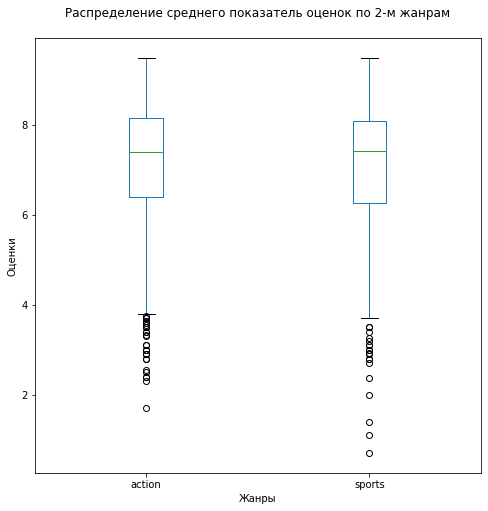

In [44]:
(gip2.pivot_table(index='genre', columns='name', values='user_score', aggfunc='mean')
 .T
 .plot(kind='box',figsize=(8,8))
)
plt.title('Распределение среднего показатель оценок по 2-м жанрам'+ "\n")
plt.xlabel('Жанры')
plt.ylabel('Оценки')

plt.show()

Оба жанра имеют нормальное распределение, можем использовать t-критерий Стьюдента

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Н0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые, т.е. средние значения равны.

Н1 -Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, т.е. средние значения не равны.

Для проверки гипотезы будет использоваться критерий p-value.

In [45]:
results = st.ttest_ind(df[(df['genre'] == "action") & (df['user_score'].notna())]['user_score'], \
                       df[(df['genre'] == "sports") & (df['user_score'].notna())]['user_score'])
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Опровергнуть нулевую гипотезу нельзя')

p-значение:  0.06480928064420527
Опровергнуть нулевую гипотезу нельзя


###### Итог - опровергнуть нулевую гипотезу нельзя

# Общий вывод

При прогнозе на 2017 год мы можем предположить следующие идеи.
- Европейский и Американский рынок в целом схожи по популярным платформам и жанрам, нам следует сделать ацкцент в этом регионе на такие платформы, как Ps4 и Xbox one, они относительное новые, динамика по продажам  одна из самых высоких из всех платформ. Потом мы видим, что даже после выхода обновленных платформ этих линий,старые платформы еще сохраняют несколько лет стабильные продажи. Жанры на которые стоит сделат это action и shooter. Игры с рейтингом М и Е cамые продоваемые.
- Японский регион имеет очень специфичный рынок, главной платформой является 3ds(она занимает 71% рынка) и поэтому основной акцент должен делаться именно на эту платформу, так же там достаточа популярна Ps4. Самые популярные жанры role- play и action. Игры с рейтингом E и T cамые продоваемые.
- Так же мы выяснели, что пользователи разных платформ по разному оценивают одни и те же игры, это стоит взять в расчет при планировнии продаж игр на разные платформы